# Retrain EfficientDet for the Edge TPU with TensorFlow Lite Model Maker

In [2]:
!pip install tflite-model-maker

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.10.0 requires tensorflow<2.11,>=2.10.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.8.3 which is incompatible.
object-detection 0.1 requires tf-models-official>=2.5.1, but you have tf-models-official 2.3.0 which is incompatible.


## Import the required packages

In [1]:
import os
import random
from pathlib import Path
import numpy as np

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

## Load the training data

In [2]:
label_map = {1: "person"}


In [3]:
data_root = Path("data/object_detection/dataset2")

In [14]:
train_images_dir = str(data_root / 'train/images')
train_annotations_dir = str(data_root / 'train/annotations')
val_images_dir = str(data_root / 'validation/images')
val_annotations_dir = str(data_root / 'validation/annotations')
test_images_dir = str(data_root / 'test/images')
test_annotations_dir = str(data_root / 'test/annotations')

In [15]:
train_data = object_detector.DataLoader.from_pascal_voc(
    train_images_dir, train_annotations_dir, label_map=label_map)
validation_data = object_detector.DataLoader.from_pascal_voc(
    val_images_dir, val_annotations_dir, label_map=label_map)
test_data = object_detector.DataLoader.from_pascal_voc(
    test_images_dir, test_annotations_dir, label_map=label_map)

In [16]:
print(f'train count: {len(train_data)}')
print(f'validation count: {len(validation_data)}')
print(f'test count: {len(test_data)}')

train count: 296
validation count: 74
test count: 0


## Select the model spec

In [17]:
spec = object_detector.EfficientDetLite0Spec()

2022-11-12 01:05:23.117411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 01:05:23.121253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 01:05:23.121711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 01:05:23.122842: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Create and train the model

In [18]:
model = object_detector.create(train_data=train_data, 
                               model_spec=spec, 
                               validation_data=validation_data, 
                               epochs=50,
                               batch_size=10, 
                               train_whole_model=True)

Epoch 1/50


2022-11-12 01:06:10.812508: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2022-11-12 01:06:11.221060: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-11-12 01:06:11.221958: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-11-12 01:06:11.221970: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-11-12 01:06:11.222009: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

29/29 [==============================] - 23s 229ms/step - det_loss: 1.4589 - cls_loss: 0.8241 - box_loss: 0.0127 - reg_l2_loss: 0.0630 - loss: 1.5220 - learning_rate: 0.0102 - gradient_norm: 2.7901 - val_det_loss: 0.9644 - val_cls_loss: 0.4942 - val_box_loss: 0.0094 - val_reg_l2_loss: 0.0631 - val_loss: 1.0274
Epoch 2/50
29/29 [==============================] - 5s 184ms/step - det_loss: 0.7496 - cls_loss: 0.3514 - box_loss: 0.0080 - reg_l2_loss: 0.0631 - loss: 0.8127 - learning_rate: 0.0125 - gradient_norm: 3.1941 - val_det_loss: 0.5915 - val_cls_loss: 0.2376 - val_box_loss: 0.0071 - val_reg_l2_loss: 0.0631 - val_loss: 0.6547
Epoch 3/50
29/29 [==============================] - 6s 197ms/step - det_loss: 0.5775 - cls_loss: 0.2682 - box_loss: 0.0062 - reg_l2_loss: 0.0632 - loss: 0.6407 - learning_rate: 0.0124 - gradient_norm: 3.4596 - val_det_loss: 0.5462 - val_cls_loss: 0.2676 - val_box_loss: 0.0056 - val_reg_l2_loss: 0.0632 - val_loss: 0.6095
Epoch 4/50
29/29 [==========================

## Evaluate the model

In [19]:
model.evaluate(validation_data)

2/2 [==============================] - 6s 1s/step



{'AP': 0.8247982,
 'AP50': 0.98845965,
 'AP75': 0.9687403,
 'APs': 0.6461142,
 'APm': 0.8625716,
 'APl': 0.89288217,
 'ARmax1': 0.8418919,
 'ARmax10': 0.87702703,
 'ARmax100': 0.8783784,
 'ARs': 0.7529412,
 'ARm': 0.9052632,
 'ARl': 0.9368421,
 'AP_/person': 0.8247982}

In [25]:
export_dir = Path('object_detection_model/model/efficientdet_lite_0')
TFLITE_FILENAME = 'efficientdet-lite.tflite'
LABELS_FILENAME = 'obj_det_labels.txt'

## Export to TensorFlow Lite

In [21]:
model.export(export_dir=str(export_dir), tflite_filename=TFLITE_FILENAME, label_filename=LABELS_FILENAME,
             export_format=[ExportFormat.TFLITE, ExportFormat.LABEL])

2022-11-12 01:12:30.632203: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-11-12 01:12:43.219373: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'resample_p7/PartitionedCall' has 1 outputs but the _output_shapes attribute specifies shapes for 3 outputs. Output shapes may be inaccurate.


Estimated count of arithmetic ops: 1.752 G  ops, equivalently 0.876 G  MACs


2022-11-12 01:12:46.704706: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-11-12 01:12:46.704731: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-11-12 01:12:46.705276: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp57f1jggo
2022-11-12 01:12:46.766842: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-11-12 01:12:46.766872: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmp57f1jggo
2022-11-12 01:12:46.953836: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-11-12 01:12:48.040984: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmp57f1jggo
2022-11-12 01:12:48.509760: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 1804485

Estimated count of arithmetic ops: 1.752 G  ops, equivalently 0.876 G  MACs


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 0
2022-11-12 01:13:28.016891: I tensorflow/compiler/mlir/lite/flatbuffer_export.cc:1963] Estimated count of arithmetic ops: 1.752 G  ops, equivalently 0.876 G  MACs



In [33]:
images_path = val_images_dir
filenames = os.listdir(os.path.join(images_path))
random_index = random.randint(0,len(filenames)-1)
INPUT_IMAGE = os.path.join(images_path, filenames[random_index])

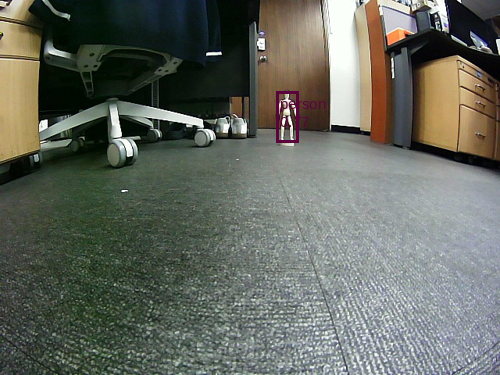

In [34]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

import tflite_runtime.interpreter as tflite 
from pycoral.adapters import common
from pycoral.adapters import detect
from pycoral.utils.dataset import read_label_file

def draw_objects(draw, objs, scale_factor, labels):
  """Draws the bounding box and label for each object."""
  COLORS = np.random.randint(0, 255, size=(len(labels), 3), dtype=np.uint8)
  for obj in objs:
    bbox = obj.bbox
    color = tuple(int(c) for c in COLORS[obj.id])
    draw.rectangle([(bbox.xmin * scale_factor, bbox.ymin * scale_factor),
                    (bbox.xmax * scale_factor, bbox.ymax * scale_factor)],
                   outline=color, width=3)
    font = ImageFont.truetype("LiberationSans-Regular.ttf", size=15)
    draw.text((bbox.xmin * scale_factor + 4, bbox.ymin * scale_factor + 4),
              '%s\n%.2f' % (labels.get(obj.id, obj.id), obj.score),
              fill=color, font=font)

# Load the TF Lite model
labels = read_label_file(str(export_dir / LABELS_FILENAME))
interpreter = tflite.Interpreter(str(export_dir / TFLITE_FILENAME))
interpreter.allocate_tensors()

# Resize the image for input
image = Image.open(INPUT_IMAGE)
_, scale = common.set_resized_input(
    interpreter, image.size, lambda size: image.resize(size, Image.ANTIALIAS))

# Run inference
interpreter.invoke()
objs = detect.get_objects(interpreter, score_threshold=0.4, image_scale=scale)

# Resize again to a reasonable size for display
display_width = 500
scale_factor = display_width / image.width
height_ratio = image.height / image.width
image = image.resize((display_width, int(display_width * height_ratio)))
draw_objects(ImageDraw.Draw(image), objs, scale_factor, labels)
image

In [40]:
import subprocess

cmd = f"edgetpu_compiler -a -o {export_dir} {export_dir / TFLITE_FILENAME}"
result = subprocess.check_output(cmd, shell = True)
print(result.decode())

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 1644 ms.

Input model: objects_on_road_processor/model/efficientdet-lite.tflite
Input size: 4.25MiB
Output model: objects_on_road_processor/model/efficientdet-lite_edgetpu.tflite
Output size: 5.57MiB
On-chip memory used for caching model parameters: 4.21MiB
On-chip memory remaining for caching model parameters: 3.29MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 267
Operation log: objects_on_road_processor/model/efficientdet-lite_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 264
Numb